© [Mariia Seleznova](https://www.ai.math.uni-muenchen.de/members/postdocs/mariia-seleznova/index.html), 2025. [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/).

# 🍷 Homework 3 — Wine classification

The goal of this task is to classify wine based on the chemical analysis data using **Ordinary Least Squares (OLS)**. 

This notebook follows the same steps as the lecture notebook.

In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

## Load the data

In [2]:
file_name = 'wine.csv'
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
column_names = ['Class','Alcohol', 'Malic acid','Ash', 'Alcalinity of ash', 'Magnesium',
               'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
                'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

if os.path.exists(file_name):
    print(f'Loading data from local file `{file_name}`...')
    df = pd.read_csv(file_name, index_col=0)
else:
    print(f'Loading data from `{url}`...')
    df = pd.read_csv(url, names=column_names)
    df.to_csv(file_name)
    print('Done.')

Loading data from local file `wine.csv`...


In [3]:
df

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## Assign class labels

There are three classes with labels $1$, $2$ and $3$ in the Wine dataset. We discard class $3$ and relabel the remaining two classes as $1$ and $-1$ to be consistent with our binary classification setup.

In [4]:
df = df[df['Class']!=3]
df['Class'] = df['Class'].replace([1,2],[1,-1])

/var/folders/9v/zb2h9_ys5yz0c88dl39lnxbh0000gn/T/ipykernel_35464/4116609049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Class'] = df['Class'].replace([1,2],[1,-1])


## Train-test split 

In [5]:
def  train_test_split(df, training_data_fraction, shuffle=True):
    """
    Split all available data into a training and test data set.
    
    Parameters:
    -----------
    df : DataFrame
        DataFrame of available data.

    training_data_fraction : float
        The fraction of the data that should be used for training.
        E.g., `training_data_fraction=0.6` means 60%.

    shuffle : bool , optional
        If True, randomly reshuffles the data before the split.

    Returns:
    -------
    _df : DataFrame
        Shuffled DataFrame

    train_df: DataFrame
        Train split
        
    test_df: DataFrame
        Test split
    """
    
    if shuffle is True:
        _df = df.sample(frac=1).reset_index(drop=True)
    else:
        _df= df
    
    train_df = _df.iloc[:round(training_data_fraction*len(_df)),:]
    test_df = _df.iloc[round(training_data_fraction*len(_df)):,:]
    
    return _df, train_df, test_df

We will first work with a two-dimensional projection of the data onto columns “Alcohol” and “Proline”.

In [6]:
training_data_fraction = .8

df, train_df, test_df =  train_test_split(df, training_data_fraction)

# convert DataFrame entries to Numpy arrays
# `X, Y`: all data
# `train_X, train_Y`: training data
# `test_X, test_Y`: training data

X = df[['Alcohol', 'Proline']].to_numpy()
Y = df['Class'].to_numpy()

train_X = train_df[['Alcohol', 'Proline']].to_numpy()
train_Y = train_df['Class'].to_numpy()

test_X = test_df[['Alcohol', 'Proline']].to_numpy()
test_Y = test_df['Class'].to_numpy()

print('Training data split as follows:')
print(f'  Training data samples: {len(train_df)}')
print(f'      Test data samples: {len(test_df)}')

Training data split as follows:
  Training data samples: 104
      Test data samples: 26


## Visualize 2d projection of the data

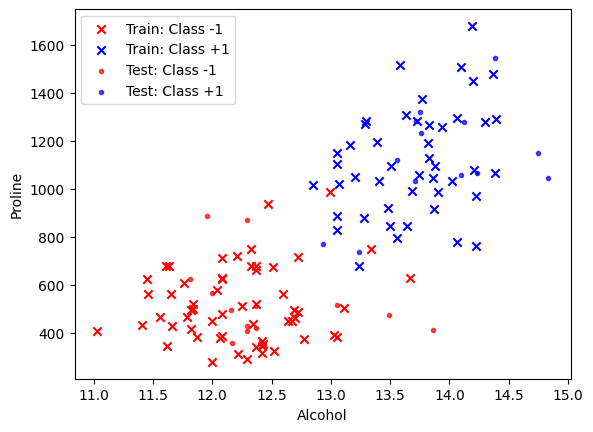

In [7]:
fig, ax = plt.subplots()

train_X_minus1 = train_X[train_Y == -1]
plt.scatter(train_X_minus1[:, 0], train_X_minus1[:, 1], marker='x', color='red', label='Train: Class -1')

train_X_plus1 = train_X[train_Y == +1]
plt.scatter(train_X_plus1[:, 0], train_X_plus1[:, 1], marker='x', color='blue', label='Train: Class +1')

test_X_minus1 = test_X[test_Y == -1]
test_X_plus1 = test_X[test_Y == +1]
plt.scatter(test_X_minus1[:, 0], test_X_minus1[:, 1], marker='.', color='red', label='Test: Class -1', alpha=.7)
plt.scatter(test_X_plus1[:, 0], test_X_plus1[:, 1], marker='.', color='blue', label='Test: Class +1', alpha=.7)

plt.xlabel('Alcohol')
plt.ylabel('Proline')
plt.legend()

## Define `OrdinaryLeastSquares` class

We define an OLS classifier as a child class of `LinearBinaryClassification`. 

`OrdinaryLeastSquares` inherits `__init__` and `__call__` methods without changes from its parent. Additionaly, this class has a method `fit`, which takes input data and sets the class attributes `w` and `b` to be the solution to the OLS problem.

<div style="border-left: 4px solid #007ACC; padding: 0.5em; background-color: #f0f8ff;">
<b>Theory:</b> The OLS problem is the following minimization problem:

$$\min_{w} \|Xw - Y\|^2_2.$$

Assuming $X$ has full column rank, the theoretical solution to this problem is given by a well-known formula:

$$w^* = (X^TX)^{-1}X^TY$$

</div>

💡 The above formula is for OLS **without intercept**, i.e. $b=0$, but we need to implement OLS **with intercept**. Our implementation solves this problem as follows:
- Add a new column to $X$, which is populated by all ones:
$$\tilde X = [X, \mathbf{1}] $$
- Solve the OLS problem for $\tilde X$.
- Now $b$ is the last entry of the solution vector!


In [8]:
class LinearBinaryClassification:
    """
    Linear binary classification class.

    Stores a linear classification model with parameters (w,b)
    and decision function h(x) = sign(w @ x + b)

    Parameters:
    ----------
    w: array
    b: array

    """
    def __init__(self, w, b):
        self.w = w
        self.b = b
        
    def __call__(self, x):
        # Numpy's `where` function provides a fast substitution
        return np.where(x @ self.w + self.b >= 0.0, 1, -1)
    
class OrdinaryLeastSquares(LinearBinaryClassification):
    """
    Ordinary least squares classifier
    """

    def fit(self, X,Y):
        _X = np.hstack( (X, np.ones(shape=(X.shape[0],1))) )
        ols_sol = np.linalg.inv(_X.T@_X)@_X.T@Y

        self.w = ols_sol[:-1]
        self.b = ols_sol[-1]

## Fit and evaluate OLS classifier

In [9]:
w = np.array([0, 0])
b = 0
model = OrdinaryLeastSquares(w, b)

model.fit(train_X,train_Y)

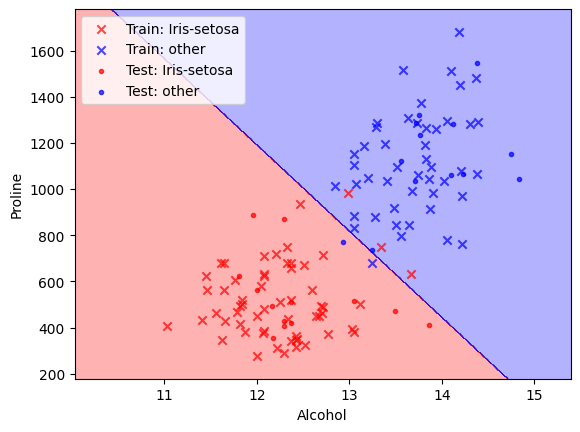

In [10]:
fig, ax = plt.subplots()

# compute how large the mesh for the contour plot shall be (with +/- 1 as
# safety bleed)
x1_min = train_X[:, 0].min() - 1
x1_max = train_X[:, 0].max() + 1
x2_min = train_X[:, 1].min() - 100
x2_max = train_X[:, 1].max() + 100

# compute grid for contour plot
x1_list, x2_list = np.meshgrid(np.arange(x1_min, x1_max, .01), 
                               np.arange(x2_min, x2_max, .5))
# meshgrid produces two arrays of the size `len(np.arange(x1_min, x1_max,
# .01))` times `len(np.arange(x2_min, x2_max, .01))` so that computations can
# be easily be vectorized.
X_list = np.dstack([x1_list, x2_list])
# present X_list to our hypothesis for evaluation
h_list = model(X_list)

cmap = matplotlib.colors.ListedColormap(['red', 'blue'])
plt.contourf(x1_list, x2_list, h_list, cmap=cmap, alpha=.3)

plt.scatter(train_X_minus1[:, 0], train_X_minus1[:, 1], marker='x', color='red', label='Train: Iris-setosa', alpha=.7)
plt.scatter(train_X_plus1[:, 0], train_X_plus1[:, 1], marker='x', color='blue', label='Train: other', alpha=.7)

plt.scatter(test_X_minus1[:, 0], test_X_minus1[:, 1], marker='.', color='red', label='Test: Iris-setosa', alpha=.7)
plt.scatter(test_X_plus1[:, 0], test_X_plus1[:, 1], marker='.', color='blue', label='Test: other', alpha=.7)

plt.xlabel('Alcohol')
plt.xlim(x1_min, x1_max)
plt.ylabel('Proline')
plt.ylim(x2_min, x2_max)
plt.legend()

In [11]:
def accuracy(y_pred,y_true):
    return (np.sum(y_pred == y_true)/y_true.size)*100

print(f"Train accuracy: {round(accuracy(model(train_X),train_Y),2)}%")
print(f"Test accuracy: {round(accuracy(model(test_X),test_Y),2)}%")

Train accuracy: 96.15%
Test accuracy: 96.15%


We see that the are classification errors. Therefore, the data is not linearly separable in the two-dimensional projection - otherwise, OLS method would give a parfect solution!

## Is the data linearly separable?

We perform OLS on the complete 13-dimensional problem.

In [12]:
X = df.iloc[:,df.columns != 'Class'].to_numpy()
Y = df.iloc[:,df.columns == 'Class'].to_numpy()

X.shape

(130, 13)

The model has 14 variables now:

In [13]:
model = w = np.array([0]*13)
b = 0

model = OrdinaryLeastSquares(w, b)
model.fit(X,Y)

In [14]:
print(f"Train accuracy: {round(accuracy(model(X),Y),2)}%")

Train accuracy: 100.0%


We calculate the total number of errors and see that the model classifies the data perfectly. Therefore, the data is linearly separable!